In [ ]:
%matplotlib notebook

import os
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as td
import torch.nn.functional as F
import torchvision as tv
from PIL import Image
import nntools as nt
import matplotlib.pyplot as plt
from dataloader import VOCDataset, myimshow
import model
class statsmanager(nt.StatsManager):
    def __init__self():
        super(statsmanager,self).__init__()

    def init(self):
        super(statsmanager,self).init()
        self.m_ap=0

    def accumulate(self,loss,x,y,d):
        #Do m_ap calculations
        super(statsmanager,self).accumulate(loss,x,y,d)


    def summarize(self):
        loss=super(statsmanager,self).summarize()
        return {'loss':loss}

def plot(self,fig,ax1, ax2 ,im):
    ax1.set_title('Image')
    x,y=train_set[0]
    myimshow(x,ax=ax1)
    ax2.set_title('Loss')
    ax2.plot([self.history[k]['loss']for k in range(self.epoch)])
    plt.tight_layout()
    fig.canvas.draw()


cuda
512


<IPython.core.display.Javascript object>


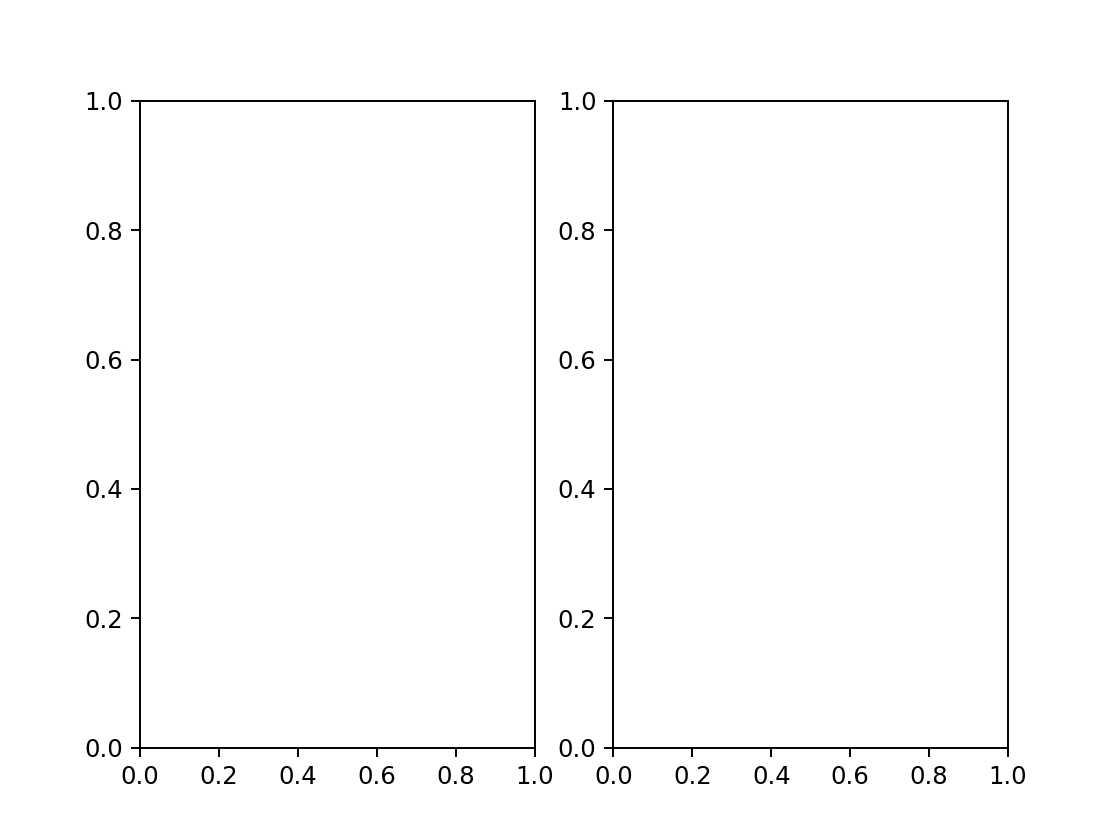

Start/Continue training from epoch 30
Finish training for 30 epochs


In [1]:
lr=1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
vgg = model.Resnet34Transfer(num_classes=20,n_batch=4)
vgg.to(device)
adam=torch.optim.Adam(vgg.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp1=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=16,output_dir="runres34",perform_validation_during_training=False)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
#exp1.run(num_epochs=30,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))
exp1.run(num_epochs=30)

In [3]:
exp1.history

[{'loss': 13752.156954247102},
 {'loss': 7166.1471609871915},
 {'loss': 1555.7991273215362},
 {'loss': 395.8789534371431},
 {'loss': 159.199892530454},
 {'loss': 135.92471434691242},
 {'loss': 85.58941016305432},
 {'loss': 81.8079857667075},
 {'loss': 80.9390474836403},
 {'loss': 76.75965565578323},
 {'loss': 74.36978541579202},
 {'loss': 74.07948610843103},
 {'loss': 74.07763499220478},
 {'loss': 74.05988353021314},
 {'loss': 74.05154541687908},
 {'loss': 192.0816733101818},
 {'loss': 74.15652827936435},
 {'loss': 74.05594129269528},
 {'loss': 74.0655732250341},
 {'loss': 74.16962666887149},
 {'loss': 74.06412618150698},
 {'loss': 74.0665614608133},
 {'loss': 74.05539103916713},
 {'loss': 74.07464193692991},
 {'loss': 74.05986066749482},
 {'loss': 74.06204605102539},
 {'loss': 111.57327281203226},
 {'loss': 74.05879078497078},
 {'loss': 74.05321865310975},
 {'loss': 74.05025630894905}]

In [ ]:
lr=1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
vgg = model.Resnet34Transfer(num_classes=20,n_batch=4)
vgg.to(device)
adam=torch.optim.Adam(vgg.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp2=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=64,output_dir="runres34fast",perform_validation_during_training=False)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
#exp1.run(num_epochs=30,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))
exp2.run(num_epochs=75)